In [8]:

import os
import tensorflow as tf
#from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

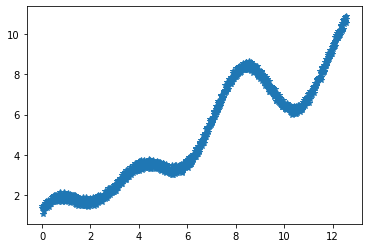

In [9]:
nPoint = 1000
X = np.linspace(0,4*np.pi, nPoint)
y = np.sin(X) + np.random.random((nPoint,))/2 + X*3/4 + np.cos(3/2*X)

X = X[..., np.newaxis]

# sc = StandardScaler()
# X2d_std = sc.fit_transform(X2d)

fig, ax = plt.subplots()
ax.plot(X,y,'*--')

In [10]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(X)

In [11]:
os.path.join( os.getcwd(),'checkpoint')

'f:\\Work\\Coding\\Class\\ai-class-2564-1\\Topic 07 - ANN\\checkpoint'

In [12]:
tf.keras.backend.clear_session()
layerIn = Input(shape=(1,))

layerMid = normalizer(layerIn)
for _ in range(2):
    layerMid = Dense(64,activation='sigmoid', kernel_initializer='normal')(layerMid)
    # layerMid = BatchNormalization()(layerMid)

layerOut = Dense(1, kernel_initializer='normal')(layerMid)

model = Model(inputs=layerIn, outputs=layerOut)

model.summary()

callback = EarlyStopping(monitor='loss', patience=40, min_delta=0)

checkpoint_filepath = os.path.join( os.getcwd(),'tmp','checkpoint')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)



model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

# model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.01),
#     loss='mean_absolute_error')

history = model.fit(X,y,epochs=1000,callbacks=[model_checkpoint_callback, callback ],verbose=1)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
Epoch 1/1000
32/32 [==============================] - 1s 28ms/step - loss: 2.2389 - mean_absolute_percentage_error: 59

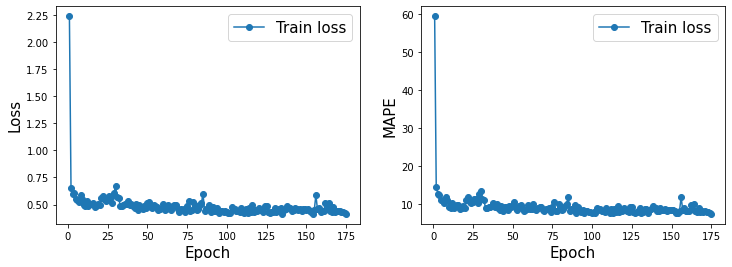

In [13]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['mean_absolute_percentage_error'], '-o', label='Train loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('MAPE', size=15)
ax.legend(fontsize=15)


plt.show()

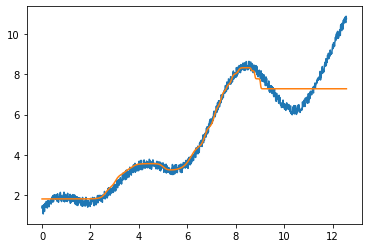

In [14]:
y_pred = model(X)
fig ,ax = plt.subplots()
ax.plot(X,y)
ax.plot(X,y_pred)